# HYPOTHESIS: I think students who believe they will get an A in the class will be more likely to reccommend the class to students next fall.

## Reading in the csv file and creating a column-oriented data table

In [2]:
from data_utils import read_csv_rows, columnar

rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(rows)

## Isolating the expected grades and recommendation columns.

In [8]:
from data_utils import select

grade_column: dict[str, list[str]] = select(columns, ["grade"])
rec_column: dict[str, list[str]] = select(columns, ["would_recommend"])

## Creating individual masks for students who believe they will get an A, B, C, D, or F.

In [17]:
a_mask = []
b_mask = []
c_mask = []
d_mask = []
f_mask = []

for grade in grade_column["grade"]:
    a_mask.append(grade == "A")
    b_mask.append(grade == "B")
    c_mask.append(grade == "C")
    d_mask.append(grade == "D")
    f_mask.append(grade == "F")


## Creating a list of recommendating values for each individual letter grade mask.

In [32]:
from data_utils import count

recommend_a = []
recommend_b = []
recommend_c = []
recommend_d = []
recommend_f = []

recommend_values = rec_column["would_recommend"]

for index in range(len(a_mask)):
    if a_mask[index]:
        recommend_a.append(recommend_values[index])
    if b_mask[index]:
        recommend_b.append(recommend_values[index])
    if c_mask[index]:
        recommend_c.append(recommend_values[index])
    if d_mask[index]:
        recommend_d.append(recommend_values[index])
    if f_mask[index]:
        recommend_f.append(recommend_values[index])
#print(recommend_b)

['7', '7', '6', '6', '6', '4', '6', '4', '6', '5', '4', '6', '4', '4', '5', '7', '4', '4', '4', '4', '4', '7', '4', '4', '4', '4', '5', '4', '4', '4', '4', '4', '4', '4', '6', '4', '4', '5', '7', '3', '4', '4', '7', '6', '4', '5', '7', '4', '6', '4', '5', '7', '7', '7', '5', '1', '6', '7', '3', '7', '5', '5', '7', '7', '5', '5', '5', '5', '4', '6', '7', '7', '7', '5', '6', '5', '7', '7', '7', '6', '3', '7', '6', '4', '4', '5', '6', '2', '3', '6', '7', '4', '7', '4', '6', '7', '4', '3', '7', '5', '6', '5', '5', '7', '7', '7', '4', '6', '7', '5', '4', '7', '4', '4', '7', '7', '6', '2', '4', '4', '7', '7', '7', '4', '6', '6', '5', '5', '5', '5', '5', '5', '6', '4', '6', '4', '7', '7', '7', '5', '4', '5', '6', '5', '6', '7', '4', '7', '7', '5', '5', '1', '6', '7', '5', '6', '5', '6', '4', '6', '4', '4', '6', '6', '5', '7', '5', '7', '6', '5', '7', '3', '7', '5', '6', '7', '2', '5', '5', '7', '6', '7', '5', '6', '4', '6', '5', '5', '7', '4', '7', '5', '7', '2', '7', '7', '7', '5', '6', '7',

## Counting the number of each recommendating value for each individual letter grade group.

In [34]:
from data_utils import count

a_count = count(recommend_a)
b_count = count(recommend_b)
c_count = count(recommend_c)
d_count = count(recommend_d)
f_count = count(recommend_f)


print(f"The total counts for students who think they will get an A is: {a_count}")
print(f"The total counts for students who think they will get a B is: {b_count}")
print(f"The total counts for students who think they will get a C is: {c_count}")
print(f"The total counts for students who think they will get a D is: {d_count}")
print(f"The total counts for students who think they will get an F is: {f_count}")

The total counts for students who think they will get an A is: {'6': 215, '4': 211, '7': 217, '5': 216, '3': 144}
The total counts for students who think they will get a B is: {'7': 123, '6': 115, '4': 116, '5': 124, '3': 120, '1': 65, '2': 107}
The total counts for students who think they will get a C is: {'3': 3, '4': 18, '2': 1, '5': 16, '6': 10, '7': 19, '1': 13}
The total counts for students who think they will get a D is: {'1': 1, '5': 3, '4': 2, '3': 1}
The total counts for students who think they will get an F is: {}


## Adding the number of students who chose values between 5-7 (Agreed to recommend). Excluding students who chose the value 4 since they neither agreed nor disagreed to recommend.

In [57]:
a_agree_list = [0]
b_agree_list = [0]
c_agree_list = [0]
d_agree_list = [0]
f_agree_list = [0]

for number in a_count:
    if number == '5' or number == '6' or number == '7':
        a_agree_list.append(a_count[number])
for number in b_count:
    if number == '5' or number == '6' or number == '7':
        b_agree_list.append(b_count[number])
for number in c_count:
    if number == '5' or number == '6' or number == '7':
        c_agree_list.append(c_count[number])
for number in d_count:
    if number == '5' or number == '6' or number == '7':
        d_agree_list.append(d_count[number])
for number in f_count:
    if number == '5' or number == '6' or number == '7':
        f_agree_list.append(f_count[number])

a_agree_count = sum(a_agree_list)
b_agree_count = sum(b_agree_list)
c_agree_count = sum(c_agree_list)
d_agree_count = sum(d_agree_list)
f_agree_count = sum(f_agree_list)



print(f"{a_agree_count} students think they will get an A and are willing to recommend the class to someone.")
print(f"{b_agree_count} students think they will get a B and are willing to recommend the class to someone.")
print(f"{c_agree_count} students think they will get a C and are willing to recommend the class to someone.")
print(f"{d_agree_count} students think they will get a D and are willing to recommend the class to someone.")
print(f"{f_agree_count} students think they will get an F and are willing to recommend the class to someone.")




648 students think they will get an A and are willing to recommend the class to someone.
362 students think they will get a B and are willing to recommend the class to someone.
45 students think they will get a C and are willing to recommend the class to someone.
3 students think they will get a D and are willing to recommend the class to someone.
0 students think they will get an F and are willing to recommend the class to someone.


## Bar graph of results.

<BarContainer object of 5 artists>

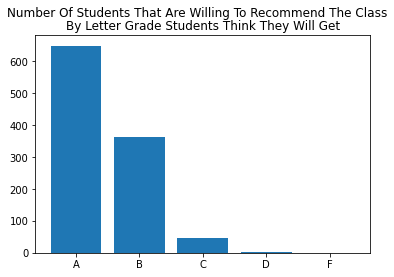

In [72]:
from matplotlib import pyplot as plt

x_axis = ["A", "B", "C", "D", "F"]
y_axis = [a_agree_count, b_agree_count, c_agree_count, d_agree_count, f_agree_count]
fig, axes = plt.subplots()
fig.suptitle("Number Of Students That Are Willing To Recommend The Class")
axes.set_title("By Letter Grade Students Think They Will Get")
axes.bar(x_axis, y_axis)